# Tv Show Popularity Analysis and Recommendation Model

In [63]:
import pandas as pd
import numpy as np


In [64]:
tvshows_df = pd.read_csv('tv_shows.csv')

# Initial Data Set

In [65]:
tvshows_df

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5606,5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1


# Data Cleaning

In [66]:
new_df=tvshows_df[tvshows_df.IMDb.notna()]
new_df=new_df[new_df.Age.notna()]
new_df=new_df[new_df['Rotten Tomatoes'].notna()]
new_df.reset_index(inplace=True)
new_df=new_df.drop(columns=['index','Unnamed: 0','type'])

 **Converting the numerical columns to decipherable type**

In [67]:
IMDb_rating=np.array(list(new_df.IMDb))
RT_rating=np.array(np.char.strip(np.array(list(new_df["Rotten Tomatoes"])),'%'),dtype='float64')
new_df['Rotten Tomatoes']=RT_rating

 **Cleaned Data Frame**

In [68]:
new_df

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,18+,9.5,96.0,1,0,0,0
1,Stranger Things,2016,16+,8.8,93.0,1,0,0,0
2,Money Heist,2017,18+,8.4,91.0,1,0,0,0
3,Sherlock,2010,16+,9.1,78.0,1,0,0,0
4,Better Call Saul,2015,18+,8.7,97.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
926,Diary of a Future President,2020,7+,5.5,100.0,0,0,0,1
927,Encore!,2019,7+,7.4,68.0,0,0,0,1
928,Spider-Man Unlimited,1999,7+,6.5,50.0,0,0,0,1
929,The Super Hero Squad Show,2009,7+,6.1,50.0,0,0,0,1


# Data Analysis

**Inital Analysis**

In [69]:
new_df.describe()

,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
count,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000
mean,2013.093448,7.534801,77.823845,0.446831,0.375940,0.227712,0.024705
std,7.606510,0.952062,20.369783,0.497432,0.484625,0.419581,0.155307
min,1959.000000,1.700000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,7.100000,67.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,7.700000,84.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,8.200000,93.000000,1.000000,1.000000,0.000000,0.000000
max,2020.000000,9.500000,100.000000,1.000000,1.000000,1.000000,1.000000


**IMDb Rating Extremes**

In [70]:
new_df[new_df.IMDb==new_df.IMDb.min()]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
732,A Little Late with Lilly Singh,2019,16+,1.7,90.0,0,1,0,0


In [71]:
new_df[new_df.IMDb==new_df.IMDb.max()]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,18+,9.5,96.0,1,0,0,0


**Unique Age Variables**

In [72]:
new_df.Age.unique()

array(['18+', '16+', '7+', 'all', '13+'], dtype=object)

**Rotten Tomatoes Rating Extremes**

In [73]:
new_df[new_df['Rotten Tomatoes']==new_df['Rotten Tomatoes'].min()]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
365,Another Life,2019,18+,4.9,6.0,1,0,0,0


In [74]:
new_df[new_df['Rotten Tomatoes']==new_df['Rotten Tomatoes'].max()]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
9,Avatar: The Last Airbender,2005,7+,9.2,100.0,1,0,0,0
15,Fullmetal Alchemist: Brotherhood,2009,18+,9.1,100.0,1,1,0,0
23,One-Punch Man,2015,16+,8.8,100.0,1,1,0,0
75,Master of None,2015,18+,8.3,100.0,1,0,0,0
88,Fauda,2015,16+,8.3,100.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
914,Star Wars Rebels,2014,7+,8.0,100.0,0,0,0,1
915,DuckTales,2017,7+,8.2,100.0,0,0,0,1
919,The Imagineering Story,2019,7+,9.1,100.0,0,0,0,1
920,Lizzie McGuire,2001,all,6.6,100.0,0,0,0,1


# Data Visualization

**Required Data Visualization Libraries and Settings**

In [75]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Release Date Histogram**

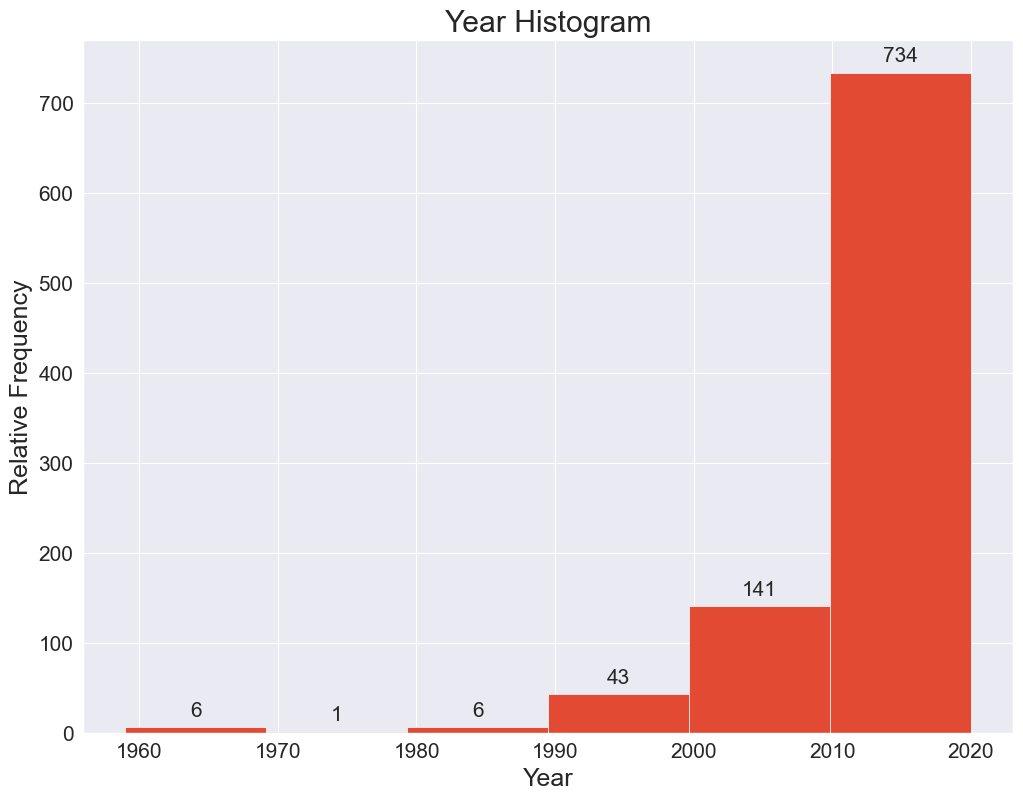

In [76]:
fig, ax = plt.subplots(figsize=(12,9))
ax.hist(new_df.Year,bins=7, density=False)
plt.xlabel("Year")
plt.ylabel("Relative Frequency")
plt.title("Year Histogram")

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height),xytext=(0, 5), textcoords='offset points', ha='center', va='bottom') 

plt.show()

**Ratings Comparison Boxplot**

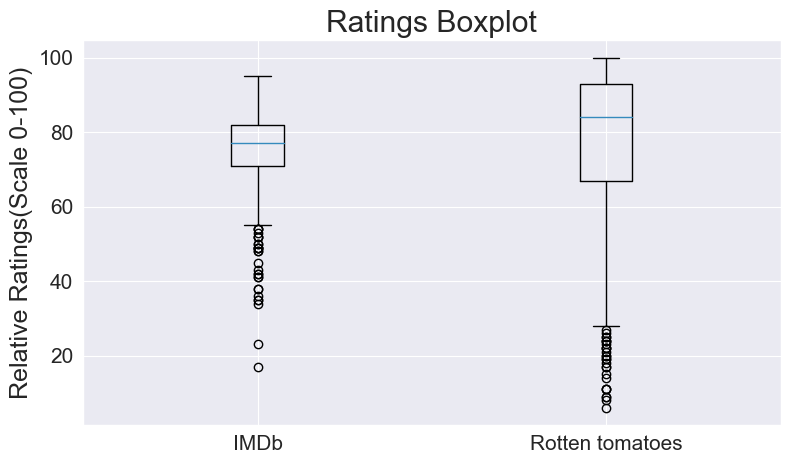

In [77]:
fig,ax = plt.subplots()
bp_data=[IMDb_rating*10,RT_rating]
ax.boxplot(bp_data)
ax.set_xticklabels(["IMDb","Rotten tomatoes"])
plt.ylabel("Relative Ratings(Scale 0-100)")
plt.title("Ratings Boxplot")
plt.show()

**Streaming Service Pie-Chart**

([<matplotlib.patches.Wedge at 0x179d91018b0>,
 [Text(0.288311852523778, 1.0615442881454864, 'Netflix'),
  Text(-0.9272407745521478, -0.5917977238955326, 'Hulu'),
  Text(0.7586703888902204, -0.7965043885762098, 'Prime Video'),
  Text(1.097135416493267, -0.07933396420289178, 'Disney+')])

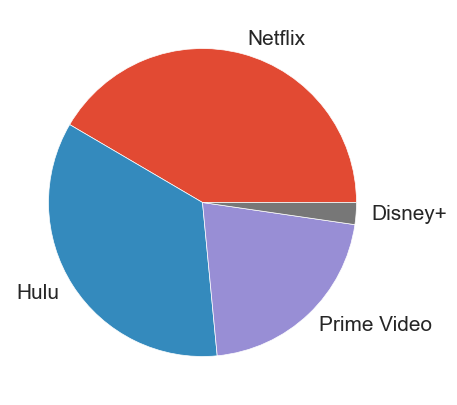

In [78]:
N = new_df['Netflix']
N.head()
Sum= N.sum()
H = new_df['Hulu']
H.head()
Hulu_total= H.sum()
P = new_df['Prime Video']
P.head()
Prime_total= P.sum()
D= new_df['Disney+']
D.head()
Disney_total= D.sum()
show_number =[416,350,212,23]
subs = [('Netflix'),('Hulu'),('Prime Video'),('Disney+')]
plt.pie(show_number,labels=subs)

**Streaming Service and Age Bar-Chart**

In [79]:
df=new_df.copy()
df = df.replace(to_replace ="18+", value = 18) 
df = df.replace(to_replace ="16+", value = 16) 
df = df.replace(to_replace ="7+", value = 7)

Netflix_total=new_df[new_df['Netflix']==1].count().Title
Hulu_total=new_df[new_df['Hulu']==1].count().Title
Prime_Video_total=new_df[new_df['Prime Video']==1].count().Title
Disney_Plus_total=new_df[new_df['Disney+']==1].count().Title

#Netflix
new =df.loc[df["Age"]==18]
new = new.loc[df["Netflix"]==1]
new.sum()
Netflix_18 =new["Netflix"].sum()

new =df.loc[df["Age"]==16]
new = new.loc[df["Netflix"]==1]
new.sum()
Netflix_16 =new["Netflix"].sum()

new =df.loc[df["Age"]==7]
new = new.loc[df["Netflix"]==1]
new.sum()
Netflix_7 =new["Netflix"].sum()

Netflix_all= Netflix_total -(Netflix_16+Netflix_7+Netflix_18)

#HULU 
new =df.loc[df["Age"]==16]
new = new.loc[df["Hulu"]==1]
new.sum()
Hulu_16 =new["Hulu"].sum()

new =df.loc[df["Age"]==18]
new = new.loc[df["Hulu"]==1]
new.sum()
Hulu_18 =new["Hulu"].sum()

new =df.loc[df["Age"]==7]
new = new.loc[df["Hulu"]==1]
new.sum()
Hulu_7 =new["Hulu"].sum()

Hulu_all =Hulu_total -(Hulu_7+Hulu_16+Hulu_18)

#Prime Video

new =df.loc[df["Age"]==16]
new = new.loc[df["Prime Video"]==1]
new.sum()
Prime_16 =new["Prime Video"].sum()

new =df.loc[df["Age"]==18]
new = new.loc[df["Prime Video"]==1]
new.sum()
Prime_18 =new["Prime Video"].sum()

new =df.loc[df["Age"]==7]
new = new.loc[df["Prime Video"]==1]
new.sum()
Prime_7 =new["Prime Video"].sum()

Prime_all =Prime_Video_total-(Prime_7+Prime_16+Prime_18)

#Disney Plus

new =df.loc[df["Age"]==16]
new = new.loc[df["Disney+"]==1]
new.sum()
Disney_16 =new["Disney+"].sum()

new =df.loc[df["Age"]==18]
new = new.loc[df["Disney+"]==1]
new.sum()
Disney_18 =new["Disney+"].sum()

new =df.loc[df["Age"]==7]
new = new.loc[df["Disney+"]==1]
new.sum()
Disney_7 =new["Disney+"].sum()

Disney_all =Disney_Plus_total-(Disney_7+Disney_16+Disney_18)

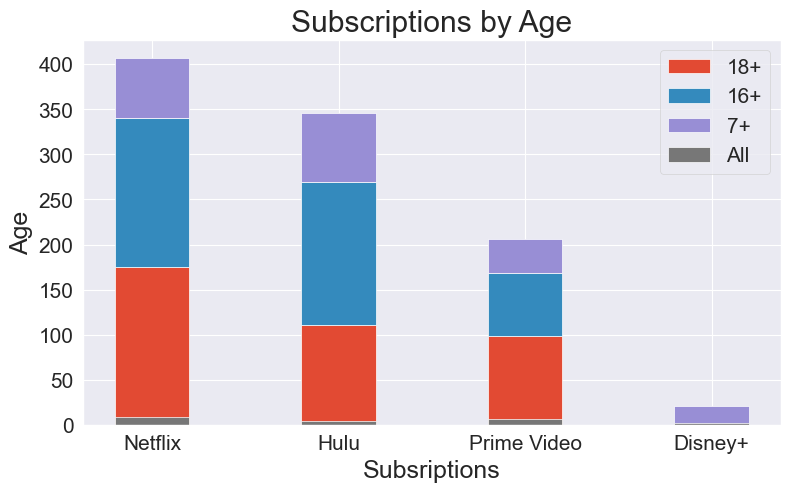

In [80]:
x = ["Netflix","Hulu","Prime Video","Disney+"]
Eighteen_Plus=[Netflix_18,Hulu_18,Prime_18,Disney_18]
Sixteen_Plus =[Netflix_16,Hulu_16,Prime_16,Disney_16]
Seven_Plus =[Netflix_7,Hulu_7,Prime_7,Disney_7]
All=[Netflix_all,Hulu_all,Prime_all,Disney_all]
b_Seven = list(np.add(Sixteen_Plus,Eighteen_Plus))

plt.bar(x,Eighteen_Plus,0.4,label ="18+")
plt.bar(x,Sixteen_Plus,0.4,bottom = Eighteen_Plus,label ="16+")
plt.bar(x,Seven_Plus,0.4,bottom = b_Seven,label ="7+")
plt.bar(x,All,0.4,label ="All")

plt.xlabel("Subsriptions")
plt.ylabel("Age")
plt.title('Subscriptions by Age')
plt.legend()
plt.show()

 # Normalization

In [81]:
#Z-Score Computation Function
def z_score(df):
    df_std = df.copy()
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
    return df_std

**Normalized Data Frame**

In [82]:
new_df_numeric = new_df[["Year","IMDb","Rotten Tomatoes"]]
df_normalized = z_score(new_df_numeric)

**Year Normal Distribution**

C:\Users\STARIZ.PK\AppData\Local\Temp\ipykernel_10292\1473705455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_normalized.Year)


<AxesSubplot: xlabel='Year', ylabel='Density'>

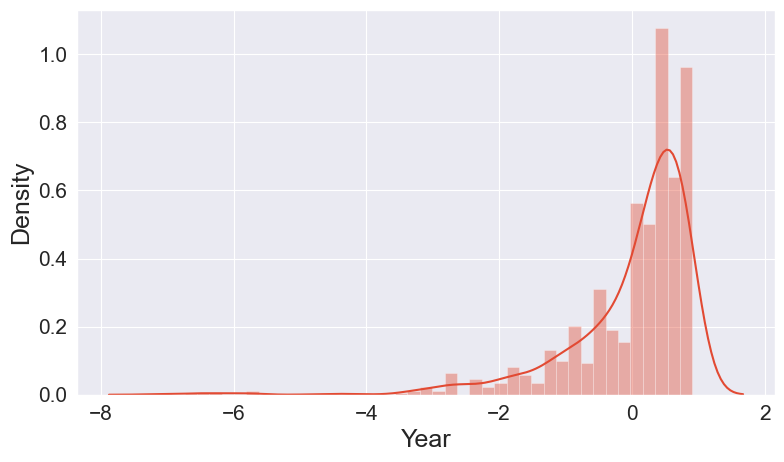

In [83]:
sns.distplot(df_normalized.Year)

In [84]:
print("Normalized Curve For Year:")
print("Mean :",df_normalized.Year.mean())
print("Standard Deviation :",df_normalized.Year.std())

Normalized Curve For Year:
Mean : 1.240480447804325e-14
Standard Deviation : 1.0000000000000013


**IMDb Normalized Distribution**

C:\Users\STARIZ.PK\AppData\Local\Temp\ipykernel_10292\3998425416.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_normalized["IMDb"])


<AxesSubplot: xlabel='IMDb', ylabel='Density'>

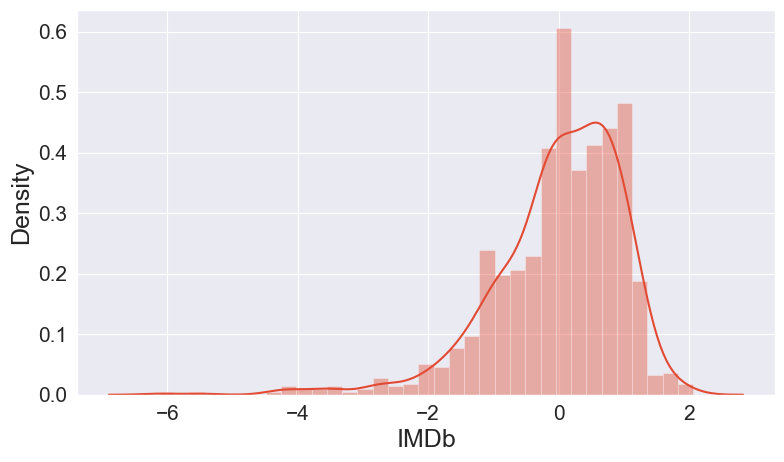

In [85]:
sns.distplot(df_normalized["IMDb"])

In [86]:
print("Normalized Curve For IMDb Rating:")
print("Mean :",df_normalized.IMDb.mean())
print("Standard Deviation :",df_normalized.IMDb.std())

Normalized Curve For IMDb Rating:
Mean : 6.537794532980621e-15
Standard Deviation : 0.9999999999999976


**Rotten Tomatoes Normalized Distribution**

C:\Users\STARIZ.PK\AppData\Local\Temp\ipykernel_10292\2516117353.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_normalized["Rotten Tomatoes"])


<AxesSubplot: xlabel='Rotten Tomatoes', ylabel='Density'>

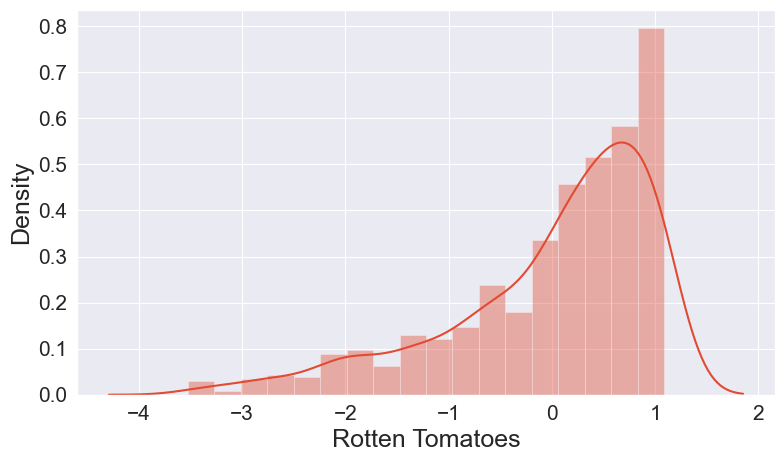

In [87]:
sns.distplot(df_normalized["Rotten Tomatoes"])

In [88]:
print("Normalized Curve For Rotten Tomatoes Rating:")
print("Mean :",df_normalized['Rotten Tomatoes'].mean())
print("Standard Deviation :",df_normalized['Rotten Tomatoes'].std())

Normalized Curve For Rotten Tomatoes Rating:
Mean : -9.671223125359849e-17
Standard Deviation : 0.9999999999999997


# Correlation Analysis

In [89]:
new_df.corr()

,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
Year,1.000000,-0.233711,-0.063455,0.183902,-0.216642,-0.204441,-0.016520
IMDb,-0.233711,1.000000,0.481183,0.008906,-0.005082,0.082427,-0.019638
Rotten Tomatoes,-0.063455,0.481183,1.000000,0.021997,0.017935,-0.016312,0.026189
Netflix,0.183902,0.008906,0.021997,1.000000,-0.568219,-0.405600,-0.143042
Hulu,-0.216642,-0.005082,0.017935,-0.568219,1.000000,-0.252236,-0.080669
Prime Video,-0.204441,0.082427,-0.016312,-0.405600,-0.252236,1.000000,-0.086422
Disney+,-0.016520,-0.019638,0.026189,-0.143042,-0.080669,-0.086422,1.000000


**Correlation with Outliers**

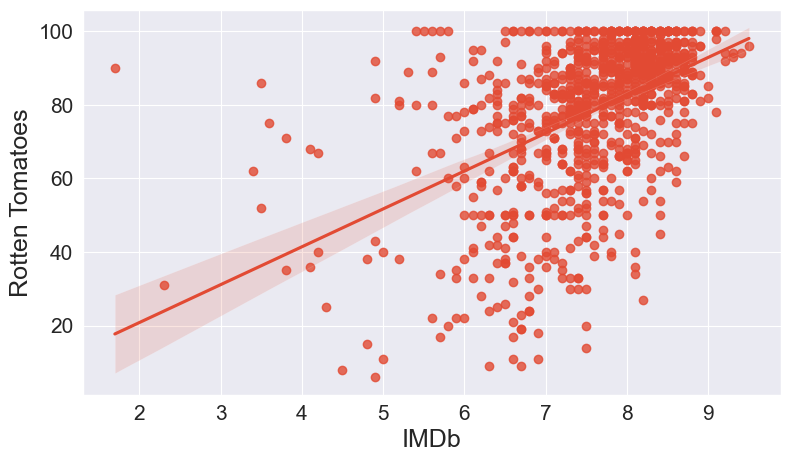

In [90]:
subset_df=new_df[['IMDb','Rotten Tomatoes']]
subset_df.corr()
sns.regplot(x="IMDb", y="Rotten Tomatoes", data=subset_df);

**IMDb rating and Rotten Tomatoes rating Correlational Analysis**

In [91]:
IMDb_rating=np.array(new_df.IMDb)
imdb_iqr=np.percentile(IMDb_rating,75)-np.percentile(IMDb_rating,25)
min_IMDb_no_outliers=max(np.percentile(IMDb_rating,25)-1.5*imdb_iqr,IMDb_rating.min())
max_IMDb_no_outliers=min(np.percentile(IMDb_rating,75)+1.5*imdb_iqr,IMDb_rating.max())
print("Minimum IMDb rating without outliers is ",min_IMDb_no_outliers)
print("Maximum IMDb rating without outliers is ",max_IMDb_no_outliers)

Minimum IMDb rating without outliers is  5.45
Maximum IMDb rating without outliers is  9.5


In [92]:
RT_rating=np.array(new_df['Rotten Tomatoes'])
rt_iqr=np.percentile(RT_rating,75)-np.percentile(RT_rating,25)
min_RT_no_outliers=max(np.percentile(RT_rating,25)-1.5*rt_iqr,RT_rating.min())
max_RT_no_outliers=min(np.percentile(RT_rating,75)+1.5*rt_iqr,RT_rating.max())
print("Minimum Rotten Tomatoes rating without outliers is ",min_RT_no_outliers)
print("Maximum Rotten Tomatoes rating without outliers is ",max_RT_no_outliers)

Minimum Rotten Tomatoes rating without outliers is  28.0
Maximum Rotten Tomatoes rating without outliers is  100.0


**Removing Outliers**

In [93]:
subset_df=new_df[['IMDb','Rotten Tomatoes']]
subset_df=subset_df[subset_df.IMDb>=min_IMDb_no_outliers]
subset_df=subset_df[subset_df.IMDb<=max_IMDb_no_outliers]
subset_df=subset_df[subset_df['Rotten Tomatoes']>=min_RT_no_outliers]
subset_df=subset_df[subset_df['Rotten Tomatoes']<=max_RT_no_outliers]

In [94]:
subset_df

,IMDb,Rotten Tomatoes
0,9.5,96.0
1,8.8,93.0
2,8.4,91.0
3,9.1,78.0
4,8.7,97.0
...,...,...
926,5.5,100.0
927,7.4,68.0
928,6.5,50.0
929,6.1,50.0


In [95]:
subset_df.mean(),subset_df.std()

(IMDb                7.663140
 Rotten Tomatoes    80.098976
 dtype: float64,
 IMDb                0.746751
 Rotten Tomatoes    17.378684
 dtype: float64)

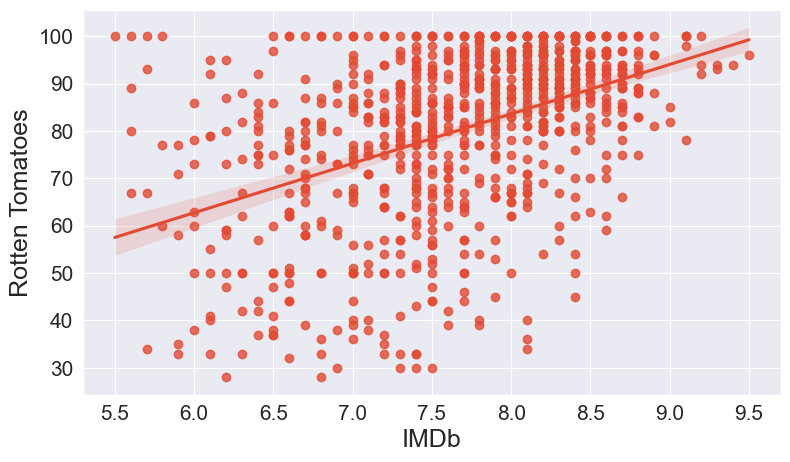

In [96]:
sns.regplot(x="IMDb", y="Rotten Tomatoes", data=subset_df);

In [97]:
subset_df.corr()

,IMDb,Rotten Tomatoes
IMDb,1.000000,0.448523
Rotten Tomatoes,0.448523,1.000000


In [98]:
subset_df=new_df[['Year','IMDb']]

In [99]:
subset_df

,Year,IMDb
0,2008,9.5
1,2016,8.8
2,2017,8.4
3,2010,9.1
4,2015,8.7
...,...,...
926,2020,5.5
927,2019,7.4
928,1999,6.5
929,2009,6.1


In [100]:
subset_df.corr()

,Year,IMDb
Year,1.000000,-0.233711
IMDb,-0.233711,1.000000


**Plot with Outliers**

<AxesSubplot: xlabel='Year', ylabel='IMDb'>

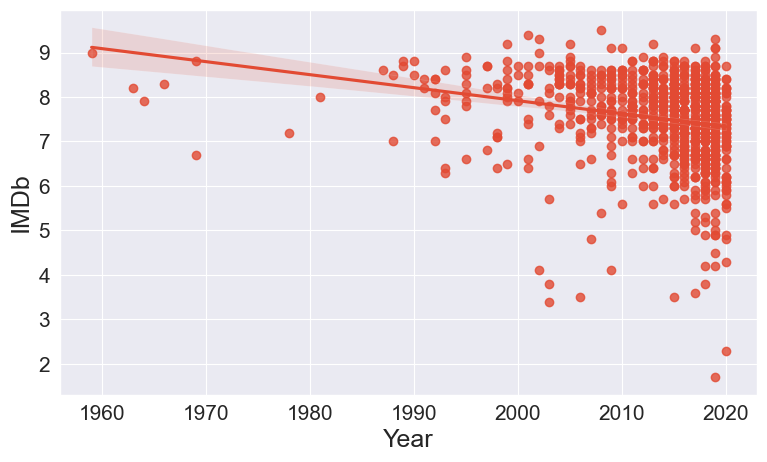

In [101]:
sns.regplot(x='Year',y='IMDb',data=subset_df)

**Removing Outliers**

In [102]:
year_rating=np.array(new_df['Year'])
year_iqr=np.percentile(year_rating,75)-np.percentile(year_rating,25)
min_year_no_outliers=(int)(max(np.percentile(year_rating,25)-1.5*year_iqr,year_rating.min()))
max_year_no_outliers=min(np.percentile(year_rating,75)+1.5*year_iqr,year_rating.max())
print("Minimum Year without outliers is ",min_year_no_outliers)
print("Maximum Year without outliers is ",max_year_no_outliers)

Minimum Year without outliers is  2000
Maximum Year without outliers is  2020


In [103]:
subset_df=new_df[['Year','IMDb']]
subset_df=subset_df[subset_df['Year']>=min_year_no_outliers]
subset_df=subset_df[subset_df['Year']<=max_year_no_outliers]
subset_df=subset_df[subset_df.IMDb>=min_IMDb_no_outliers]
subset_df=subset_df[subset_df.IMDb<=max_IMDb_no_outliers]

In [104]:
subset_df

,Year,IMDb
0,2008,9.5
1,2016,8.8
2,2017,8.4
3,2010,9.1
4,2015,8.7
...,...,...
923,2015,7.4
926,2020,5.5
927,2019,7.4
929,2009,6.1


In [105]:
subset_df.mean(),subset_df.std()

(Year    2014.481087
 IMDb       7.612766
 dtype: float64,
 Year    4.622456
 IMDb    0.757247
 dtype: float64)

In [106]:
subset_df.corr()

,Year,IMDb
Year,1.000000,-0.302962
IMDb,-0.302962,1.000000


**Plot without Outliers**

<AxesSubplot: xlabel='Year', ylabel='IMDb'>

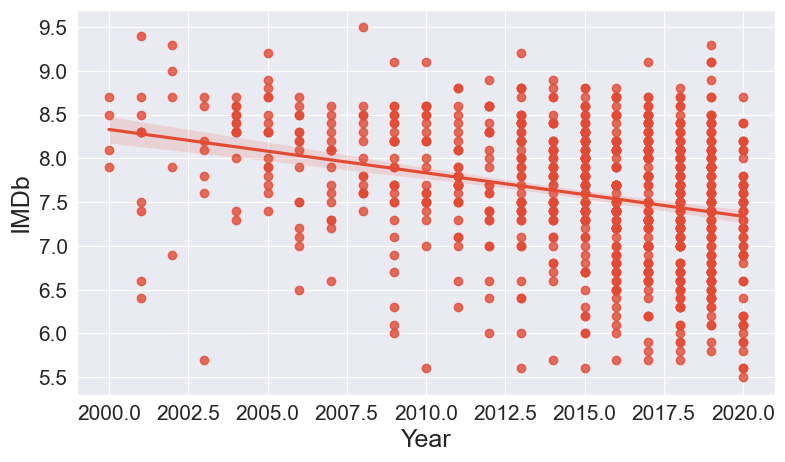

In [107]:
sns.regplot(x='Year',y='IMDb',data=subset_df)

# Now Analyzing The Netflix

**Importing Libraries and making a copy**

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics


data= pd.read_csv('titles.csv')
dc=data.copy()

dc

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.000


**Analyzing Type** 

In [109]:
dc["type"].unique()

array(['SHOW', 'MOVIE'], dtype=object)

**Movies vs Tv-Shows**

In [110]:
x=dc["type"].value_counts()
x

MOVIE    3744
SHOW     2106
Name: type, dtype: int64

In [111]:
a=x[0]
b=x[1]
dic= {"Movie": a, "SHOW": b}
dic.keys()

dict_keys(['Movie', 'SHOW'])

<BarContainer object of 2 artists>

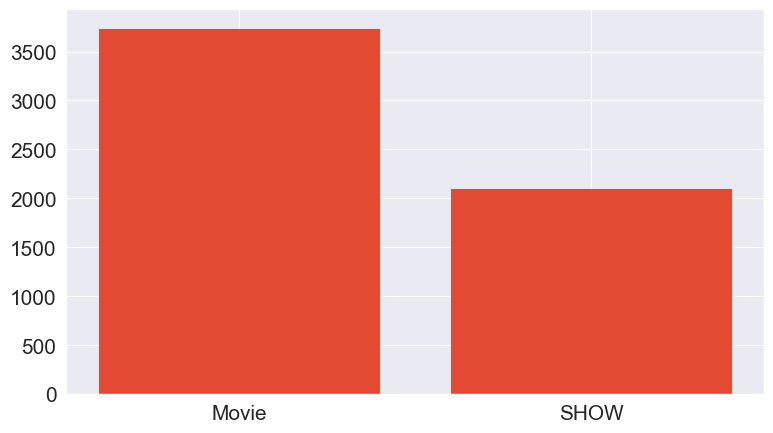

In [112]:
plt.bar(dic.keys(),dic.values())

**Analyzing Age_Certification**

In [113]:
dc["age_certification"].unique()

array(['TV-MA', 'R', 'PG', nan, 'TV-14', 'PG-13', 'TV-PG', 'TV-Y', 'TV-G',
       'TV-Y7', 'G', 'NC-17'], dtype=object)

{'TV-MA': 883, 'R': 556, 'TV-14': 474, 'PG-13': 451, 'PG': 233, 'TV-PG': 188, 'G': 124, 'TV-Y7': 120, 'TV-Y': 107, 'TV-G': 79, 'NC-17': 16}


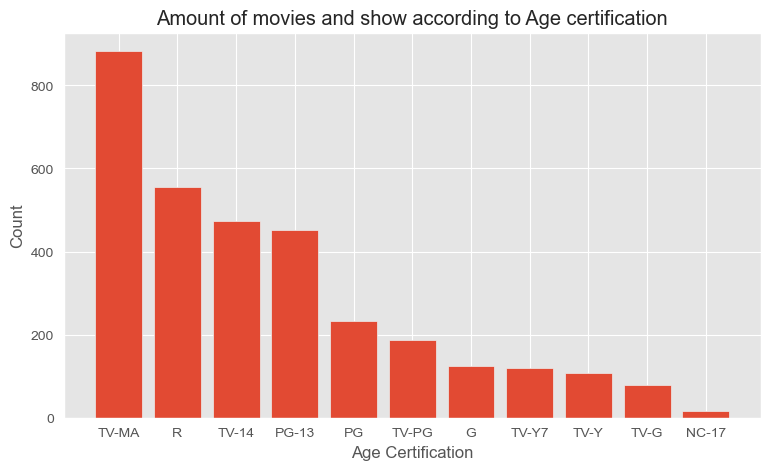

In [114]:
acc=dc["age_certification"].value_counts()
SD = acc.to_dict()
print(SD)

key=SD.keys()
value=SD.values()


plt.style.use('ggplot')

plt.bar(key, value)
plt.title('Amount of movies and show according to Age certification')
plt.ylabel('Count')
plt.xlabel('Age Certification')
plt.show()

**Analyzing Genre**

In [115]:
dc["genres"].unique()

array(["['documentation']", "['drama', 'crime']",
       "['drama', 'action', 'thriller', 'european']", ...,
       "['drama', 'animation', 'music']",
       "['animation', 'family', 'scifi']",
       "['documentation', 'music', 'reality']"], dtype=object)

In [116]:
h=dc["genres"].value_counts().head()
# x
# # dict = x.to_dict('dict')
# # dict
# y=dc["genres"].value_counts().head().keys()
# print(y)
# y.values()
studentDict = h.to_dict()
x=studentDict.keys()
y=studentDict.values()

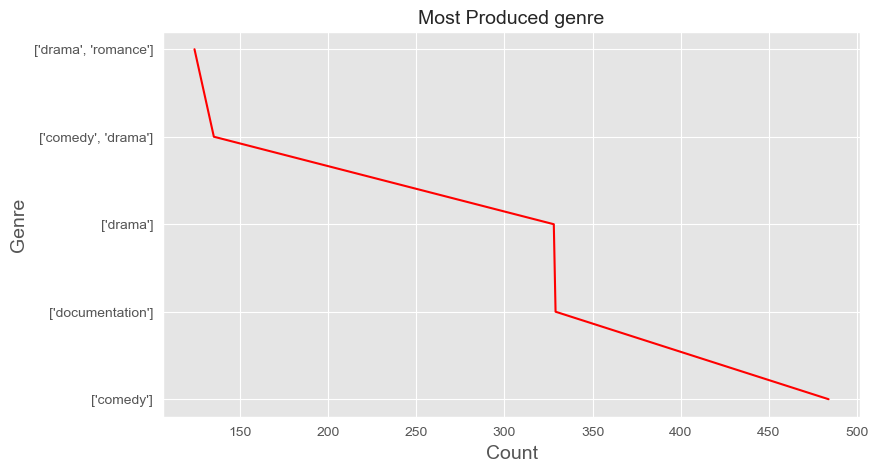

In [117]:
plt.plot(y, x, color='red')
plt.title('Most Produced genre', fontsize=14)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.grid(True)
plt.show()

**Analyzing production Countries**

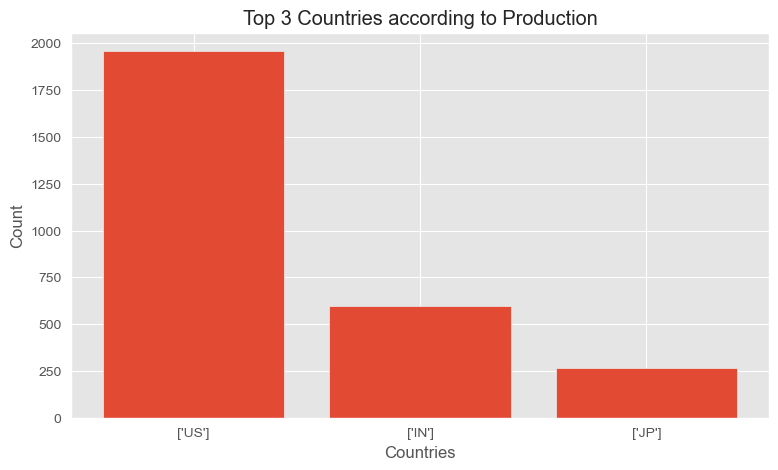

In [118]:
topv=dc["production_countries"].value_counts().head(3)

dict=topv.to_dict()
key=dict.keys()
value=dict.values()

plt.style.use('ggplot')

plt.bar(key, value)
plt.title('Top 3 Countries according to Production')
plt.ylabel('Count')
plt.xlabel('Countries')
plt.show()

**Analyzing Runtime**

In [119]:
show=(dc["runtime"]=="SHOW").value_counts()
movie=(dc["runtime"]=="MOVIE").value_counts()

print("show :",show)
print("movie :",movie)

show : False    5850
Name: runtime, dtype: int64
movie : False    5850
Name: runtime, dtype: int64


**Boosted During Covid-19**

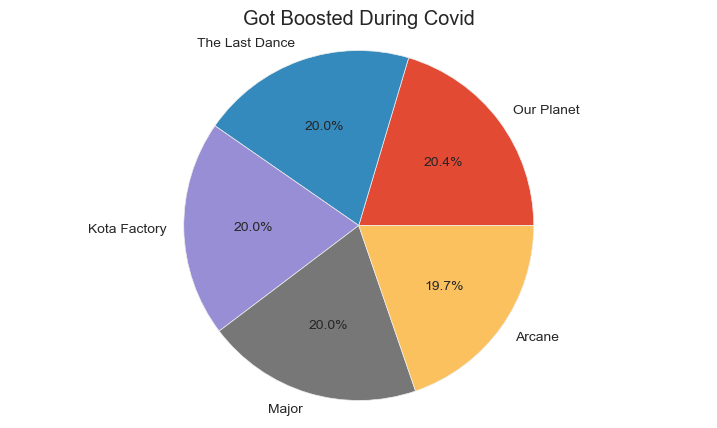

In [120]:
a=dc.loc[dc["release_year"]>=2019]
b=dc.loc[dc["release_year"]<=2021]

year=dc[(dc['release_year'] >=2019) & (dc['release_year'] <2023)]
imdbsc=year[(year['imdb_score'] > 7)]
top=imdbsc.nlargest(5, ['imdb_score'])
titles=top['title']
score=top['imdb_score']

ti = titles.to_dict()
sc = score.to_dict()
x=ti.values()
y=sc.values()

my_data = y
my_labels = x
plt.pie(my_data, labels=my_labels,autopct='%1.1f%%')
plt.title('Got Boosted During Covid')
plt.axis('equal')
plt.show()

In [121]:
dc.nlargest(10, ['tmdb_popularity'])

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
4707,tm1143265,Incantation,MOVIE,Inspired by a true story of a family who belie...,2022,NaN,111,['horror'],['TW'],NaN,tt18968540,6.2,5660.0,2274.044,7.400
1123,ts38796,Stranger Things,SHOW,"When a young boy vanishes, a small town uncove...",2016,TV-14,61,"['scifi', 'thriller', 'drama', 'fantasy', 'hor...",['US'],5.0,tt4574334,8.7,1101055.0,2226.231,8.635
4702,tm1067148,The Sea Beast,MOVIE,When a young girl stows away on the ship of a ...,2022,PG,115,"['comedy', 'family', 'fantasy', 'scifi', 'anim...",['US'],NaN,tt9288046,7.1,18852.0,1723.363,7.634
4714,tm928497,Valley of the Dead,MOVIE,They're soldiers on different sides of the war...,2022,R,101,"['comedy', 'horror', 'war', 'fantasy', 'thrill...",['ES'],NaN,tt10127708,6.5,114.0,1668.296,6.303
4696,tm852360,The Man from Toronto,MOVIE,"In a case of mistaken identity, the world’s de...",2022,PG-13,110,"['action', 'thriller', 'drama', 'romance', 'co...",['US'],NaN,tt11671006,5.8,31497.0,1439.906,6.449
4693,ts252861,Resident Evil,SHOW,Nearly three decades after the discovery of th...,2022,TV-MA,51,"['scifi', 'thriller', 'action', 'horror']",['US'],1.0,tt9660182,3.7,24982.0,1387.392,5.956
5059,tm1210379,Collision,MOVIE,"Over the course of one fateful day, a corrupt ...",2022,NaN,99,"['drama', 'crime', 'thriller']",['ZA'],NaN,tt10809742,3.9,886.0,1194.149,5.946
833,ts20110,Peaky Blinders,SHOW,"A gangster family epic set in 1919 Birmingham,...",2013,TV-MA,58,"['crime', 'drama', 'european']",['GB'],6.0,tt2442560,8.8,511668.0,1038.077,8.558
4699,tm1020438,Spiderhead,MOVIE,"In the near future, convicts are offered the c...",2022,R,106,"['scifi', 'thriller', 'drama', 'action', 'crime']",['US'],NaN,tt9783600,5.4,43239.0,996.869,5.800
1136,ts36147,Lucifer,SHOW,"Bored and unhappy as the Lord of Hell, Lucifer...",2016,TV-14,47,"['scifi', 'crime', 'drama', 'fantasy']",['US'],6.0,tt4052886,8.1,313124.0,922.112,8.523


In [122]:
dc['genres'].value_counts()

['comedy']                                                       484
['documentation']                                                329
['drama']                                                        328
['comedy', 'drama']                                              135
['drama', 'romance']                                             124
                                                                ... 
['drama', 'war', 'action', 'thriller', 'history', 'european']      1
['thriller', 'crime', 'drama', 'western']                          1
['drama', 'scifi', 'fantasy', 'horror']                            1
['horror', 'fantasy', 'thriller']                                  1
['documentation', 'music', 'reality']                              1
Name: genres, Length: 1726, dtype: int64

In [123]:
runtime=dc['runtime']
runtime.describe()

count    5850.000000
mean       76.888889
std        39.002509
min         0.000000
25%        44.000000
50%        83.000000
75%       104.000000
max       240.000000
Name: runtime, dtype: float64

In [124]:
runtime=dc['runtime'].max()
print('max runtime=',runtime)
score=dc['imdb_score'].max()
print('max score=',score)

max runtime= 240
max score= 9.6


# Movie/Tv-Show Recommendation

In [137]:
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud,STOPWORDS

warnings.filterwarnings("ignore")


netflix_dataset = pd.read_csv('netflix_titles.csv')

netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Identify the unique values**

In [126]:
dict = {}
for i in list(netflix_dataset.columns):
    dict[i] = netflix_dataset[i].value_counts().shape[0]

print(pd.DataFrame(dict, index=["Unique counts"]).transpose())

              Unique counts
show_id                8807
type                      2
title                  8807
director               4528
cast                   7692
country                 748
date_added             1767
release_year             74
rating                   17
duration                220
listed_in               514
description            8775


**Identify the missing values**

In [127]:
temp = netflix_dataset.isnull().sum()
uniq = pd.DataFrame({'Columns': temp.index, 'Numbers of Missing Values': temp.values})
uniq

,Columns,Numbers of Missing Values
0,show_id,0
1,type,0
2,title,0
3,director,2634
4,cast,825
5,country,831
6,date_added,10
7,release_year,0
8,rating,4
9,duration,3


**Analysis of Movies vs TV Shows**

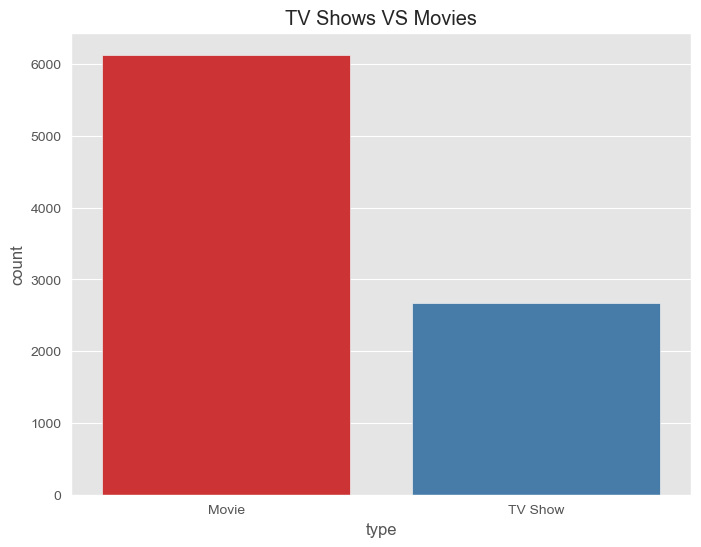

In [128]:
netflix_shows=netflix_dataset[netflix_dataset['type']=='TV Show']
netflix_movies=netflix_dataset[netflix_dataset['type']=='Movie']

plt.figure(figsize=(8,6))
ax= sns.countplot(x = "type", data = netflix_dataset,palette="Set1")
ax.set_title("TV Shows VS Movies")
plt.show()

**This shows that there are more Movies than TV Shows on Netflix**

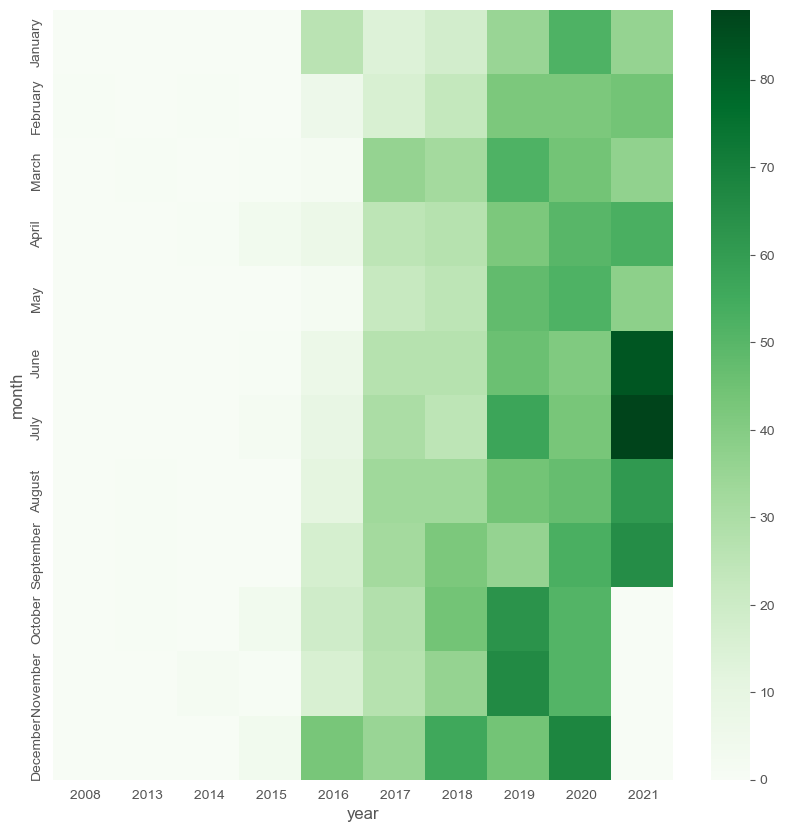

In [129]:
netflix_date= netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x: x.split(',')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.split(' ')[0])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] #::-1 just reverse this nigga

df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.subplots(figsize=(10,10))
sns.heatmap(df,cmap='Greens') #heatmap
plt.show()

***This heatmap shows frequencies of TV shows added to Netflix throughout the years.***

**Year wise analysis**

In [130]:
Last_fifteen_years = netflix_dataset[netflix_dataset['release_year']>2005 ]
Last_fifteen_years.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Year wise analysis in graph**

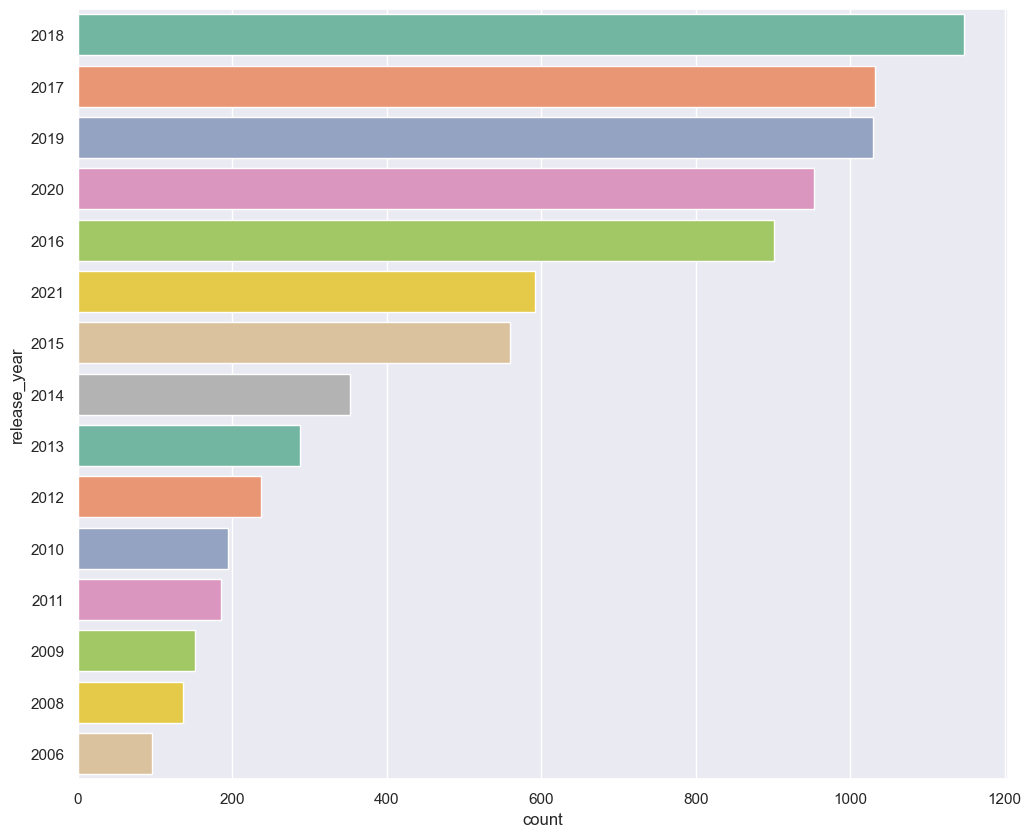

In [131]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=Last_fifteen_years, palette="Set2", order=netflix_dataset['release_year'].value_counts().index[0:15])
plt.show()

# Analysis of duration of TV shows

features=['title','duration']
durations= netflix_shows[features]
durations['no_of_seasons']=durations['duration'].str.replace(' Season','')
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

**TV shows with largest number of seasons**

                                   title  no_of_seasons
548                       Grey's Anatomy             17
2423                        Supernatural             15
4798                                NCIS             15
1354                           Heartland             13
4220              COMEDIANS of the world             13
7847                        Red vs. Blue             13
4964                   Trailer Park Boys             12
5412                      Criminal Minds             12
6795                             Frasier             11
6456                              Cheers             11
2203                    Shameless (U.S.)             10
6806                             Friends             10
1759  LEGO Ninjago: Masters of Spinjitzu             10
5908    Danger Mouse: Classic Collection             10
390                     The Walking Dead             10
1622                       Stargate SG-1             10
6549                          Dad's Army        

<Figure size 8000x6000 with 0 Axes>

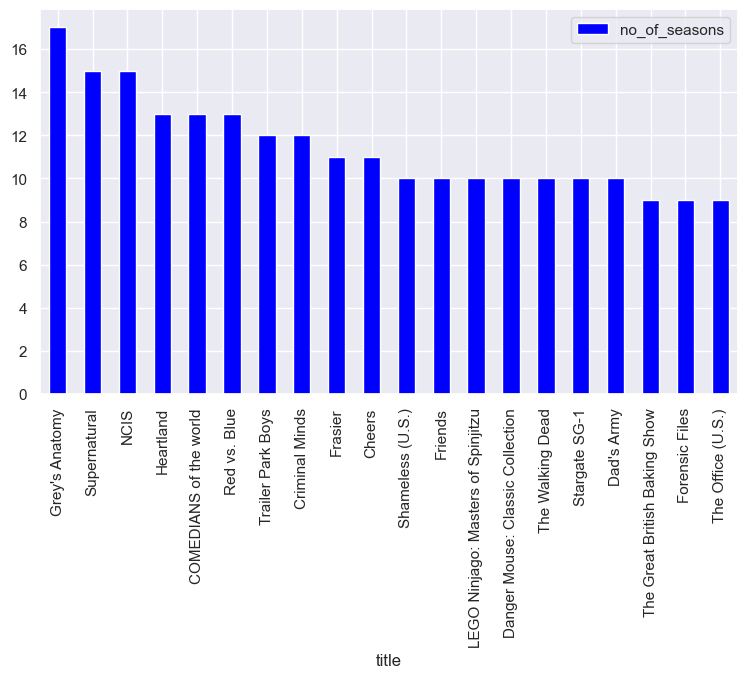

In [132]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

top20=top[0:20]
print(top20)
plt.figure(figsize=(80,60))
top20.plot(kind='bar',x='title',y='no_of_seasons', color='blue')
plt.show()


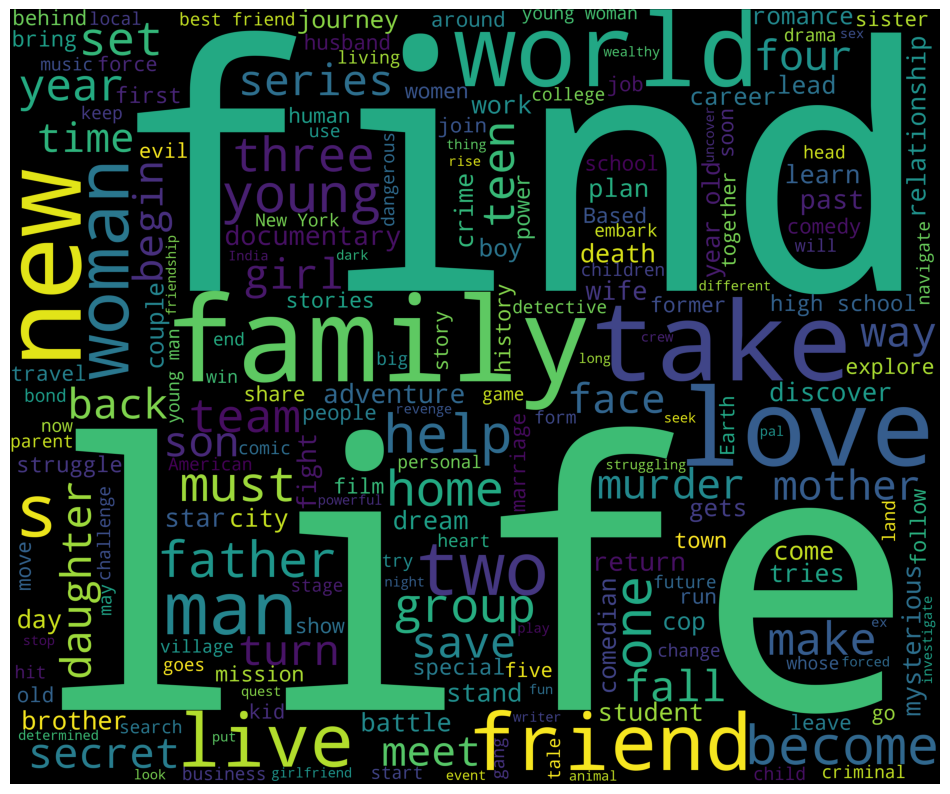

In [133]:
new_df = netflix_dataset['description']
words = ' '.join(new_df)
cleaned_word = " ".join([word for word in words.split()
                                                     ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


**Filling null values with empty string.**

In [134]:
filledna=netflix_dataset.fillna('')
filledna.head()

#Cleaning the data - making all the words lower case
def clean_data(x):
        return str.lower(x.replace(" ", ""))

#Identifying features on which the model is to be filtered.
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)

filledna.head()

def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

filledna['soup'] = filledna.apply(create_soup, axis=1)

In [135]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

# Reset index of our main DataFrame and construct reverse mapping as before
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])


In [136]:
def get_recommendations_new(title, cosine_sim = cosine_sim2):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_dataset['title'].iloc[movie_indices]

recommendations = get_recommendations_new('squidgame ', cosine_sim2)
print(recommendations)

3288               Chief of Staff
5438    Under the Black Moonlight
1412                     Wish You
3473                       The K2
3684                    Kakegurui
4127                         Live
5665               Color of Woman
1503       Lovestruck in the City
5667              Goodbye My Wife
1955       The School Nurse Files
Name: title, dtype: object
